Downloaded seurat object, transfer from rdm to scratch

``` bash
rsync -azvhp /QRISdata/Q5935/nikita/scdata/PRJCA005422/ /scratch/user/s4436039/scdata/PRJCA005422 
```

##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **PRJCA005422**

file downloaded:
raw_object.rds

In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/PRJCA005422')
getwd()

[1] "/scratch/user/s4436039"

[1] "/scratch/user/s4436039/scdata/PRJCA005422"

In [7]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)

In [8]:
#Load in downloaded RDS
OC <- readRDS("/scratch/user/s4436039/scdata/PRJCA005422/raw_object.rds")

In [12]:
head(OC@meta.data) 
tail(OC@meta.data) 

orig.ident nCount_RNA nFeature_RNA
EOC1_PBMC_cell_AAACCTGAGAAGGCCT EOC1        6737      1661        
EOC1_PBMC_cell_AAACCTGAGATGCGAC EOC1       33892      4374        
EOC1_PBMC_cell_AAACCTGAGCTGTTCA EOC1        4999      1636        
EOC1_PBMC_cell_AAACCTGAGGGTCTCC EOC1        6399      1627        
EOC1_PBMC_cell_AAACCTGAGGTGCTAG EOC1        3766      1269        
EOC1_PBMC_cell_AAACCTGCAAAGGCGT EOC1        3916      1173        
                                Cellname                        Samples  
EOC1_PBMC_cell_AAACCTGAGAAGGCCT EOC1_PBMC_cell_AAACCTGAGAAGGCCT HGSOC1_BC
EOC1_PBMC_cell_AAACCTGAGATGCGAC EOC1_PBMC_cell_AAACCTGAGATGCGAC HGSOC1_BC
EOC1_PBMC_cell_AAACCTGAGCTGTTCA EOC1_PBMC_cell_AAACCTGAGCTGTTCA HGSOC1_BC
EOC1_PBMC_cell_AAACCTGAGGGTCTCC EOC1_PBMC_cell_AAACCTGAGGGTCTCC HGSOC1_BC
EOC1_PBMC_cell_AAACCTGAGGTGCTAG EOC1_PBMC_cell_AAACCTGAGGTGCTAG HGSOC1_BC
EOC1_PBMC_cell_AAACCTGCAAAGGCGT EOC1_PBMC_cell_AAACCTGCAAAGGCGT HGSOC1_BC
                                Groups Patients percent.mt percent.ribo
EOC1_PBMC_cell_AAACCTGAGAAGGCCT PBMC   HGSOC1   2.953837   47.36530    
EOC1_PBMC_cell_AAACCTGAGATGCGAC PBMC   HGSOC1   4.900862   22.13502    
EOC1_PBMC_cell_AAACCTGAGCTGTTCA PBMC   HGSOC1   3.580716   37.60752    
EOC1_PBMC_cell_AAACCTGAGGGTCTCC PBMC   HGSOC1   2.453508   46.36662    
EOC1_PBMC_cell_AAACCTGAGGTGCTAG PBMC   HGSOC1   6.027616   36.37812    
EOC1_PBMC_cell_AAACCTGCAAAGGCGT PBMC   HGSOC1   2.860061   46.27171    
                                percent.HSP S.Score     G2M.Score  
EOC1_PBMC_cell_AAACCTGAGAAGGCCT 0.3265548    0.00206277 -0.07325614
EOC1_PBMC_cell_AAACCTGAGATGCGAC 0.5783076   -0.03958396 -0.08887451
EOC1_PBMC_cell_AAACCTGAGCTGTTCA 0.2800560    0.00392598 -0.12380690
EOC1_PBMC_cell_AAACCTGAGGGTCTCC 0.3438037   -0.05858825 -0.09282529
EOC1_PBMC_cell_AAACCTGAGGTGCTAG 0.4248540    0.01469597 -0.06016309
EOC1_PBMC_cell_AAACCTGCAAAGGCGT 0.2553626   -0.06918704 -0.07071317
                                Annotation            Group_abb maintypes_2
EOC1_PBMC_cell_AAACCTGAGAAGGCCT T01_CD4-CCR7          BC        CD4+ T     
EOC1_PBMC_cell_AAACCTGAGATGCGAC B03_PlasmaB-SDC1      BC        B          
EOC1_PBMC_cell_AAACCTGAGCTGTTCA T01_CD4-CCR7          BC        CD4+ T     
EOC1_PBMC_cell_AAACCTGAGGGTCTCC T01_CD4-CCR7          BC        CD4+ T     
EOC1_PBMC_cell_AAACCTGAGGTGCTAG B02_FollicularB-MS4A1 BC        B          
EOC1_PBMC_cell_AAACCTGCAAAGGCGT T01_CD4-CCR7          BC        CD4+ T     
                                maintypes_3    UMAP_1    UMAP_2   
EOC1_PBMC_cell_AAACCTGAGAAGGCCT Lymphoid cells -6.403656  6.157662
EOC1_PBMC_cell_AAACCTGAGATGCGAC Lymphoid cells  1.918203 13.411985
EOC1_PBMC_cell_AAACCTGAGCTGTTCA Lymphoid cells -5.025195  5.683392
EOC1_PBMC_cell_AAACCTGAGGGTCTCC Lymphoid cells -5.745404  5.792777
EOC1_PBMC_cell_AAACCTGAGGTGCTAG Lymphoid cells -6.601071 12.586838
EOC1_PBMC_cell_AAACCTGCAAAGGCGT Lymphoid cells -5.874930  5.854532

orig.ident nCount_RNA nFeature_RNA
C1_OC_cell_TGAAAGATCTGTTGAG C1         11492      3467        
C1_OC_cell_TGCTACCGTCCGAACC C1         20797      4986        
C1_OC_cell_TGGGCGTTCACTATTC C1         24397      5799        
C1_OC_cell_TGTCCCAGTAACGACG C1          3355      1584        
C1_OC_cell_TGTTCCGCAGGTCTCG C1          6057      2142        
C1_OC_cell_TTCTCAATCACCTTAT C1         10312      3497        
                            Cellname                    Samples Groups       
C1_OC_cell_TGAAAGATCTGTTGAG C1_OC_cell_TGAAAGATCTGTTGAG C1_PT   Primary Tumor
C1_OC_cell_TGCTACCGTCCGAACC C1_OC_cell_TGCTACCGTCCGAACC C1_PT   Primary Tumor
C1_OC_cell_TGGGCGTTCACTATTC C1_OC_cell_TGGGCGTTCACTATTC C1_PT   Primary Tumor
C1_OC_cell_TGTCCCAGTAACGACG C1_OC_cell_TGTCCCAGTAACGACG C1_PT   Primary Tumor
C1_OC_cell_TGTTCCGCAGGTCTCG C1_OC_cell_TGTTCCGCAGGTCTCG C1_PT   Primary Tumor
C1_OC_cell_TTCTCAATCACCTTAT C1_OC_cell_TTCTCAATCACCTTAT C1_PT   Primary Tumor
                            Patients percent.mt percent.ribo percent.HSP
C1_OC_cell_TGAAAGATCTGTTGAG C1       4.716324   11.90393     0.5308040  
C1_OC_cell_TGCTACCGTCCGAACC C1       6.736549   14.33861     0.9424436  
C1_OC_cell_TGGGCGTTCACTATTC C1       3.939009   12.40316     1.6723370  
C1_OC_cell_TGTCCCAGTAACGACG C1       3.964232   15.29061     1.2220570  
C1_OC_cell_TGTTCCGCAGGTCTCG C1       8.915305   17.76457     0.8915305  
C1_OC_cell_TTCTCAATCACCTTAT C1       4.325058   13.07215     1.0085340  
                            S.Score      G2M.Score    Annotation      
C1_OC_cell_TGAAAGATCTGTTGAG -0.024740290 -0.009191254 E03_ENDO-IL13RA1
C1_OC_cell_TGCTACCGTCCGAACC -0.074286100 -0.077468690 E03_ENDO-IL13RA1
C1_OC_cell_TGGGCGTTCACTATTC  0.247324900  0.465105500 E06_ENDO-MKI67  
C1_OC_cell_TGTCCCAGTAACGACG -0.005340521  0.006410820 E05_ENDO-KIT    
C1_OC_cell_TGTTCCGCAGGTCTCG  0.006440935 -0.030069060 E03_ENDO-IL13RA1
C1_OC_cell_TTCTCAATCACCTTAT -0.025662310 -0.029561440 E05_ENDO-KIT    
                            Group_abb maintypes_2         maintypes_3        
C1_OC_cell_TGAAAGATCTGTTGAG PT        Endothelial cells   Endothelial cells  
C1_OC_cell_TGCTACCGTCCGAACC PT        Endothelial cells   Endothelial cells  
C1_OC_cell_TGGGCGTTCACTATTC PT        Proliferative cells Proliferative cells
C1_OC_cell_TGTCCCAGTAACGACG PT        Endothelial cells   Endothelial cells  
C1_OC_cell_TGTTCCGCAGGTCTCG PT        Endothelial cells   Endothelial cells  
C1_OC_cell_TTCTCAATCACCTTAT PT        Endothelial cells   Endothelial cells  
                            UMAP_1   UMAP_2  
C1_OC_cell_TGAAAGATCTGTTGAG 6.160834 13.40850
C1_OC_cell_TGCTACCGTCCGAACC 6.011838 13.73860
C1_OC_cell_TGGGCGTTCACTATTC 5.372723 12.89852
C1_OC_cell_TGTCCCAGTAACGACG 5.991465 13.53124
C1_OC_cell_TGTTCCGCAGGTCTCG 5.800605 12.96732
C1_OC_cell_TTCTCAATCACCTTAT 5.916722 13.69530

## Is it too processed??
## here down not edited

In [5]:
#Add dataset info to colnames
colnames(OC_Cancer1.data) <- paste0("GSE184880_Cancer1_", colnames(OC_Cancer1.data))
colnames(OC_Cancer2.data) <- paste0("GSE184880_Cancer2_", colnames(OC_Cancer2.data))
colnames(OC_Cancer3.data) <- paste0("GSE184880_Cancer3_", colnames(OC_Cancer3.data))
colnames(OC_Cancer4.data) <- paste0("GSE184880_Cancer4_", colnames(OC_Cancer4.data))
colnames(OC_Cancer5.data) <- paste0("GSE184880_Cancer5_", colnames(OC_Cancer5.data))
colnames(OC_Cancer6.data) <- paste0("GSE184880_Cancer6_", colnames(OC_Cancer6.data))
colnames(OC_Cancer7.data) <- paste0("GSE184880_Cancer7_", colnames(OC_Cancer7.data))
colnames(OC_Norm1.data) <- paste0("GSE184880_Norm1_", colnames(OC_Norm1.data))
colnames(OC_Norm2.data) <- paste0("GSE184880_Norm2_", colnames(OC_Norm2.data))
colnames(OC_Norm3.data) <- paste0("GSE184880_Norm3_", colnames(OC_Norm3.data))
colnames(OC_Norm4.data) <- paste0("GSE184880_Norm4_", colnames(OC_Norm4.data))
colnames(OC_Norm5.data) <- paste0("GSE184880_Norm5_", colnames(OC_Norm5.data))

In [6]:
head(colnames(OC_Cancer1.data))

[1] "GSE184880_Cancer1_AAACCCAAGTATAGGT-1"
[2] "GSE184880_Cancer1_AAACCCACAAGGTACG-1"
[3] "GSE184880_Cancer1_AAACCCACACCATAAC-1"
[4] "GSE184880_Cancer1_AAACCCACAGCTGCCA-1"
[5] "GSE184880_Cancer1_AAACCCACATAACAGA-1"
[6] "GSE184880_Cancer1_AAACCCACATGACGGA-1"

In [7]:
#create seperate seurat object for each sample
OC_Cancer1 <- CreateSeuratObject(counts = OC_Cancer1.data, project = "GSE184880", min.features = 200)

#add metadata to sample
OC_Cancer1@meta.data$sample_type <- "tumour"
OC_Cancer1@meta.data$cancer_type <- "HGSOC"
OC_Cancer1@meta.data$patient_id <- "Cancer1"
OC_Cancer1@meta.data$sample_id <- "GSE184880_HGSOC_Cancer1"

In [8]:
#Repeat for remaining samples

#create seperate seurat object for each sample
OC_Cancer2 <- CreateSeuratObject(counts = OC_Cancer2.data, project = "GSE184880", min.features = 200)

#add metadata to sample
OC_Cancer2@meta.data$sample_type <- "tumour"
OC_Cancer2@meta.data$cancer_type <- "HGSOC"
OC_Cancer2@meta.data$patient_id <- "Cancer2"
OC_Cancer2@meta.data$sample_id <- "GSE184880_HGSOC_Cancer2"

#create seperate seurat object for each sample
OC_Cancer3 <- CreateSeuratObject(counts = OC_Cancer3.data, project = "GSE184880", min.features = 200)

#add metadata to sample
OC_Cancer3@meta.data$sample_type <- "tumour"
OC_Cancer3@meta.data$cancer_type <- "HGSOC"
OC_Cancer3@meta.data$patient_id <- "Cancer3"
OC_Cancer3@meta.data$sample_id <- "GSE184880_HGSOC_Cancer3"

#create seperate seurat object for each sample
OC_Cancer4 <- CreateSeuratObject(counts = OC_Cancer4.data, project = "GSE184880", min.features = 200)

#add metadata to sample
OC_Cancer4@meta.data$sample_type <- "tumour"
OC_Cancer4@meta.data$cancer_type <- "HGSOC"
OC_Cancer4@meta.data$patient_id <- "Cancer4"
OC_Cancer4@meta.data$sample_id <- "GSE184880_HGSOC_Cancer4"

#create seperate seurat object for each sample
OC_Cancer5 <- CreateSeuratObject(counts = OC_Cancer5.data, project = "GSE184880", min.features = 200)

#add metadata to sample
OC_Cancer5@meta.data$sample_type <- "tumour"
OC_Cancer5@meta.data$cancer_type <- "HGSOC"
OC_Cancer5@meta.data$patient_id <- "Cancer5"
OC_Cancer5@meta.data$sample_id <- "GSE184880_HGSOC_Cancer5"

#create seperate seurat object for each sample
OC_Cancer6 <- CreateSeuratObject(counts = OC_Cancer6.data, project = "GSE184880", min.features = 200)

#add metadata to sample
OC_Cancer6@meta.data$sample_type <- "tumour"
OC_Cancer6@meta.data$cancer_type <- "HGSOC"
OC_Cancer6@meta.data$patient_id <- "Cancer6"
OC_Cancer6@meta.data$sample_id <- "GSE184880_HGSOC_Cancer6"

#create seperate seurat object for each sample
OC_Cancer7 <- CreateSeuratObject(counts = OC_Cancer7.data, project = "GSE184880", min.features = 200)

#add metadata to sample
OC_Cancer7@meta.data$sample_type <- "tumour"
OC_Cancer7@meta.data$cancer_type <- "HGSOC"
OC_Cancer7@meta.data$patient_id <- "Cancer7"
OC_Cancer7@meta.data$sample_id <- "GSE184880_HGSOC_Cancer7"

#create seperate seurat object for each sample
OC_Norm1 <- CreateSeuratObject(counts = OC_Norm1.data, project = "GSE184880", min.features = 200)

#add metadata to sample
OC_Norm1@meta.data$sample_type <- "Healthy_ovary"
OC_Norm1@meta.data$cancer_type <- "Healthy"
OC_Norm1@meta.data$patient_id <- "Norm1"
OC_Norm1@meta.data$sample_id <- "GSE184880_Healthy_Norm1"

#create seperate seurat object for each sample
OC_Norm2 <- CreateSeuratObject(counts = OC_Norm2.data, project = "GSE184880", min.features = 200)

#add metadata to sample
OC_Norm2@meta.data$sample_type <- "Healthy_ovary"
OC_Norm2@meta.data$cancer_type <- "Healthy"
OC_Norm2@meta.data$patient_id <- "Norm2"
OC_Norm2@meta.data$sample_id <- "GSE184880_Healthy_Norm2"

#create seperate seurat object for each sample
OC_Norm3 <- CreateSeuratObject(counts = OC_Norm3.data, project = "GSE184880", min.features = 200)

#add metadata to sample
OC_Norm3@meta.data$sample_type <- "Healthy_ovary"
OC_Norm3@meta.data$cancer_type <- "Healthy"
OC_Norm3@meta.data$patient_id <- "Norm3"
OC_Norm3@meta.data$sample_id <- "GSE184880_Healthy_Norm3"

#create seperate seurat object for each sample
OC_Norm4 <- CreateSeuratObject(counts = OC_Norm4.data, project = "GSE184880", min.features = 200)

#add metadata to sample
OC_Norm4@meta.data$sample_type <- "Healthy_ovary"
OC_Norm4@meta.data$cancer_type <- "Healthy"
OC_Norm4@meta.data$patient_id <- "Norm4"
OC_Norm4@meta.data$sample_id <- "GSE184880_Healthy_Norm4"

#create seperate seurat object for each sample
OC_Norm5 <- CreateSeuratObject(counts = OC_Norm5.data, project = "GSE184880", min.features = 200)

#add metadata to sample
OC_Norm5@meta.data$sample_type <- "Healthy_ovary"
OC_Norm5@meta.data$cancer_type <- "Healthy"
OC_Norm5@meta.data$patient_id <- "Norm5"
OC_Norm5@meta.data$sample_id <- "GSE184880_Healthy_Norm5"

In [9]:
head(OC_Norm3@meta.data) 

orig.ident nCount_RNA nFeature_RNA
GSE184880_Norm3_AAACCCAAGACCAAAT-1 GSE184880  19746      5070        
GSE184880_Norm3_AAACCCAAGACTCTAC-1 GSE184880   4703      1765        
GSE184880_Norm3_AAACCCAAGAGCACTG-1 GSE184880  37518      6090        
GSE184880_Norm3_AAACCCAAGCCTGTCG-1 GSE184880   4413      1348        
GSE184880_Norm3_AAACCCAAGCTGGAGT-1 GSE184880   6284      2098        
GSE184880_Norm3_AAACCCAGTCGAACAG-1 GSE184880  49639      6291        
                                   sample_type   cancer_type patient_id
GSE184880_Norm3_AAACCCAAGACCAAAT-1 Healthy_ovary Healthy     Norm3     
GSE184880_Norm3_AAACCCAAGACTCTAC-1 Healthy_ovary Healthy     Norm3     
GSE184880_Norm3_AAACCCAAGAGCACTG-1 Healthy_ovary Healthy     Norm3     
GSE184880_Norm3_AAACCCAAGCCTGTCG-1 Healthy_ovary Healthy     Norm3     
GSE184880_Norm3_AAACCCAAGCTGGAGT-1 Healthy_ovary Healthy     Norm3     
GSE184880_Norm3_AAACCCAGTCGAACAG-1 Healthy_ovary Healthy     Norm3     
                                   sample_id              
GSE184880_Norm3_AAACCCAAGACCAAAT-1 GSE184880_Healthy_Norm3
GSE184880_Norm3_AAACCCAAGACTCTAC-1 GSE184880_Healthy_Norm3
GSE184880_Norm3_AAACCCAAGAGCACTG-1 GSE184880_Healthy_Norm3
GSE184880_Norm3_AAACCCAAGCCTGTCG-1 GSE184880_Healthy_Norm3
GSE184880_Norm3_AAACCCAAGCTGGAGT-1 GSE184880_Healthy_Norm3
GSE184880_Norm3_AAACCCAGTCGAACAG-1 GSE184880_Healthy_Norm3

In [10]:
#Merge seurat objects

OC <- merge(OC_Cancer1, y = c(OC_Cancer2, OC_Cancer3, OC_Cancer4, OC_Cancer5, OC_Cancer6, OC_Cancer7, OC_Norm1, OC_Norm2, OC_Norm3, OC_Norm4, OC_Norm5), project = "GSE184880")

In [11]:
OC
head(OC@meta.data)
tail(OC@meta.data)

An object of class Seurat 
27984 features across 64659 samples within 1 assay 
Active assay: RNA (27984 features, 0 variable features)
 12 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12

orig.ident nCount_RNA nFeature_RNA
GSE184880_Cancer1_AAACCCAAGTATAGGT-1 GSE184880   4528      1744        
GSE184880_Cancer1_AAACCCACAAGGTACG-1 GSE184880  61565      6280        
GSE184880_Cancer1_AAACCCACACCATAAC-1 GSE184880  31254      6009        
GSE184880_Cancer1_AAACCCACAGCTGCCA-1 GSE184880   9374      2655        
GSE184880_Cancer1_AAACCCACATAACAGA-1 GSE184880   4304      1728        
GSE184880_Cancer1_AAACCCACATGACGGA-1 GSE184880   2659      1246        
                                     sample_type cancer_type patient_id
GSE184880_Cancer1_AAACCCAAGTATAGGT-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACAAGGTACG-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACACCATAAC-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACAGCTGCCA-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACATAACAGA-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACATGACGGA-1 tumour      HGSOC       Cancer1   
                                     sample_id              
GSE184880_Cancer1_AAACCCAAGTATAGGT-1 GSE184880_HGSOC_Cancer1
GSE184880_Cancer1_AAACCCACAAGGTACG-1 GSE184880_HGSOC_Cancer1
GSE184880_Cancer1_AAACCCACACCATAAC-1 GSE184880_HGSOC_Cancer1
GSE184880_Cancer1_AAACCCACAGCTGCCA-1 GSE184880_HGSOC_Cancer1
GSE184880_Cancer1_AAACCCACATAACAGA-1 GSE184880_HGSOC_Cancer1
GSE184880_Cancer1_AAACCCACATGACGGA-1 GSE184880_HGSOC_Cancer1

orig.ident nCount_RNA nFeature_RNA
GSE184880_Norm5_TTTGGTTTCTATACGG-1 GSE184880   14248     4434        
GSE184880_Norm5_TTTGTTGAGTAACGTA-1 GSE184880    8668     3128        
GSE184880_Norm5_TTTGTTGCATCCTGTC-1 GSE184880     784      518        
GSE184880_Norm5_TTTGTTGGTAGTGCGA-1 GSE184880  120558     7912        
GSE184880_Norm5_TTTGTTGGTATCGTTG-1 GSE184880    1361      703        
GSE184880_Norm5_TTTGTTGGTCAGTCCG-1 GSE184880    8453     2043        
                                   sample_type   cancer_type patient_id
GSE184880_Norm5_TTTGGTTTCTATACGG-1 Healthy_ovary Healthy     Norm5     
GSE184880_Norm5_TTTGTTGAGTAACGTA-1 Healthy_ovary Healthy     Norm5     
GSE184880_Norm5_TTTGTTGCATCCTGTC-1 Healthy_ovary Healthy     Norm5     
GSE184880_Norm5_TTTGTTGGTAGTGCGA-1 Healthy_ovary Healthy     Norm5     
GSE184880_Norm5_TTTGTTGGTATCGTTG-1 Healthy_ovary Healthy     Norm5     
GSE184880_Norm5_TTTGTTGGTCAGTCCG-1 Healthy_ovary Healthy     Norm5     
                                   sample_id              
GSE184880_Norm5_TTTGGTTTCTATACGG-1 GSE184880_Healthy_Norm5
GSE184880_Norm5_TTTGTTGAGTAACGTA-1 GSE184880_Healthy_Norm5
GSE184880_Norm5_TTTGTTGCATCCTGTC-1 GSE184880_Healthy_Norm5
GSE184880_Norm5_TTTGTTGGTAGTGCGA-1 GSE184880_Healthy_Norm5
GSE184880_Norm5_TTTGTTGGTATCGTTG-1 GSE184880_Healthy_Norm5
GSE184880_Norm5_TTTGTTGGTCAGTCCG-1 GSE184880_Healthy_Norm5

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


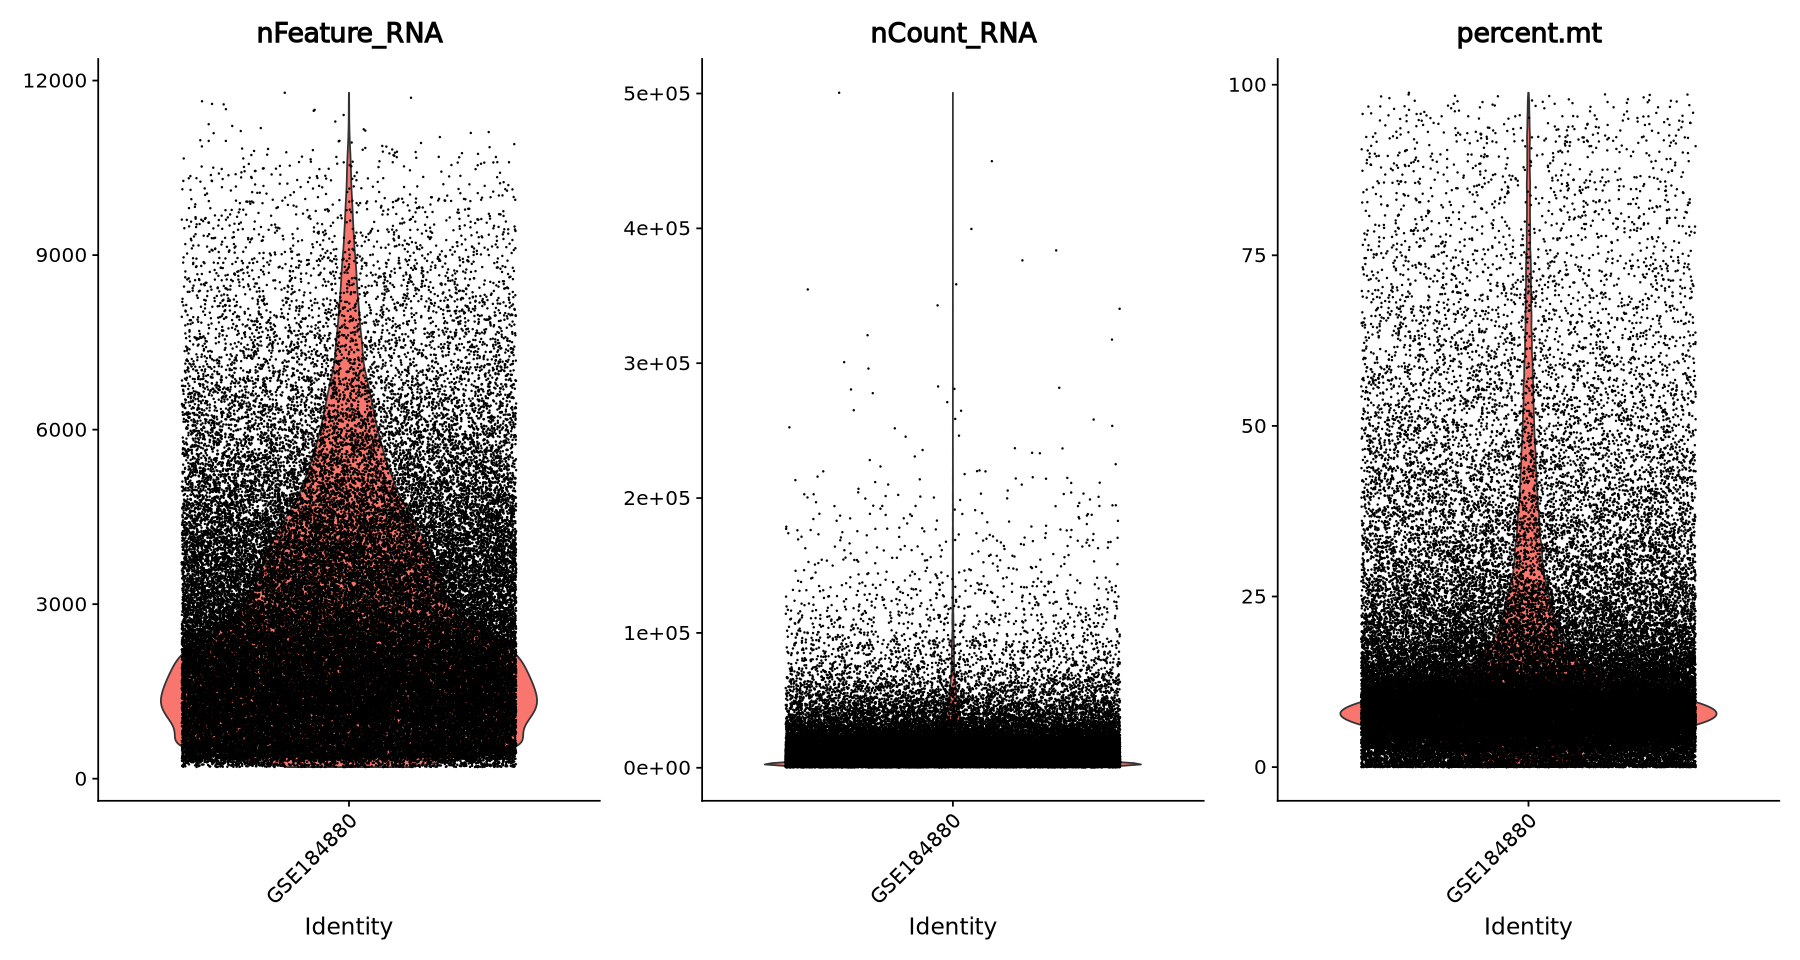

In [12]:
#QC Steps 
OC[["percent.mt"]] <- PercentageFeatureSet(OC, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(OC, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [13]:
#Normalise the data
OC <- NormalizeData(OC)
#Find variable features
OC <- FindVariableFeatures(OC, selection.method = "vst", nfeatures = 2000)
#Scale the data
OC <- ScaleData(OC, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run pca
OC <- RunPCA(OC, features = VariableFeatures(object = OC))

Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Normalizing layer: counts.5

Normalizing layer: counts.6

Normalizing layer: counts.7

Normalizing layer: counts.8

Normalizing layer: counts.9

Normalizing layer: counts.10

Normalizing layer: counts.11

Normalizing layer: counts.12

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3

Finding variable features for layer counts.4

Finding variable features for layer counts.5

Finding variable features for layer counts.6

Finding variable features for layer counts.7

Finding variable features for layer counts.8

Finding variable features for layer counts.9

Finding variable features for layer counts.10

Finding variable features for layer counts.11

Finding variable features for layer counts.12

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  CA

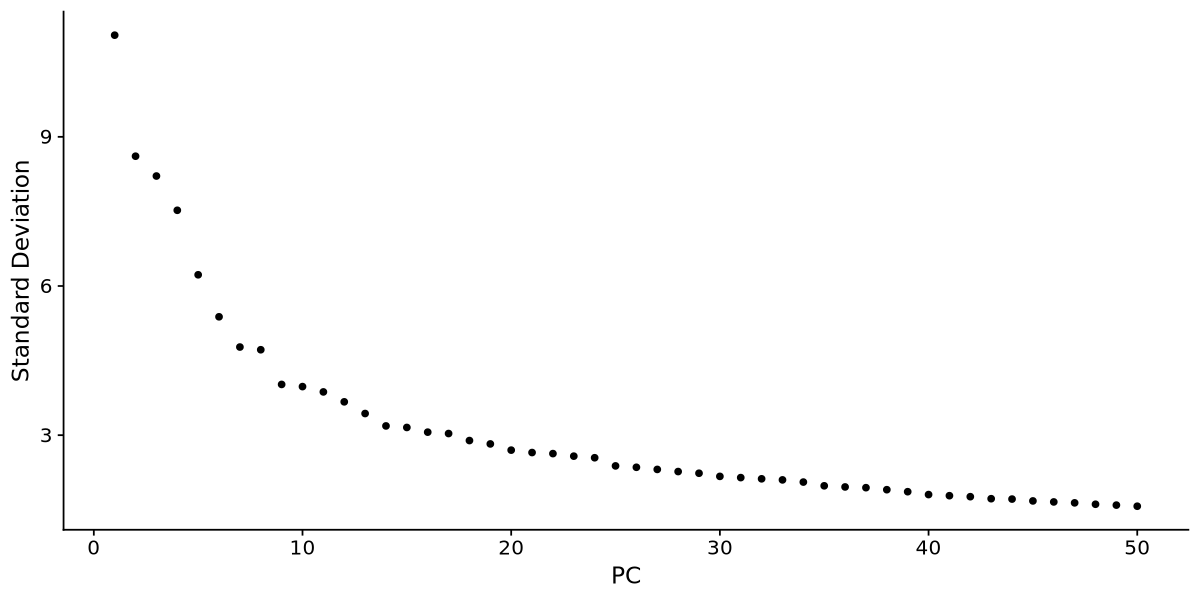

In [14]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(OC, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [15]:
#Find neighbours (make sure number matches no. features chosen above)
OC <- FindNeighbors(OC, dims = 1:40)

Computing nearest neighbor graph

Computing SNN



In [16]:
#Run UMAP
OC <- RunUMAP(OC, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
12:20:44 UMAP embedding parameters a = 0.9922 b = 1.112

12:20:44 Read 64659 rows and found 40 numeric columns

12:20:44 Using Annoy for neighbor search, n_neighbors = 30

12:20:44 Building Annoy index with metric = cosine, n_trees = 50



0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:20:49 Writing NN index file to temp file /scratch/temp/9148248/RtmpaAH5e2/file6bf3f21067fcb

12:20:49 Searching Annoy index using 1 thread, search_k = 3000

12:21:07 Annoy recall = 100%

12:21:07 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

12:21:09 Initializing from normalized Laplacian + noise (using RSpectra)

12:21:12 Commencing optimization for 200 epochs, with 2893966 positive edges

12:21:35 Optimization finished



In [17]:
#Cluster, resolution here set to 0.2, originally tried 0.5 which gave heaps of clusters
OC <- FindClusters(OC, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 64659
Number of edges: 2390406

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9729
Number of communities: 24
Elapsed time: 12 seconds


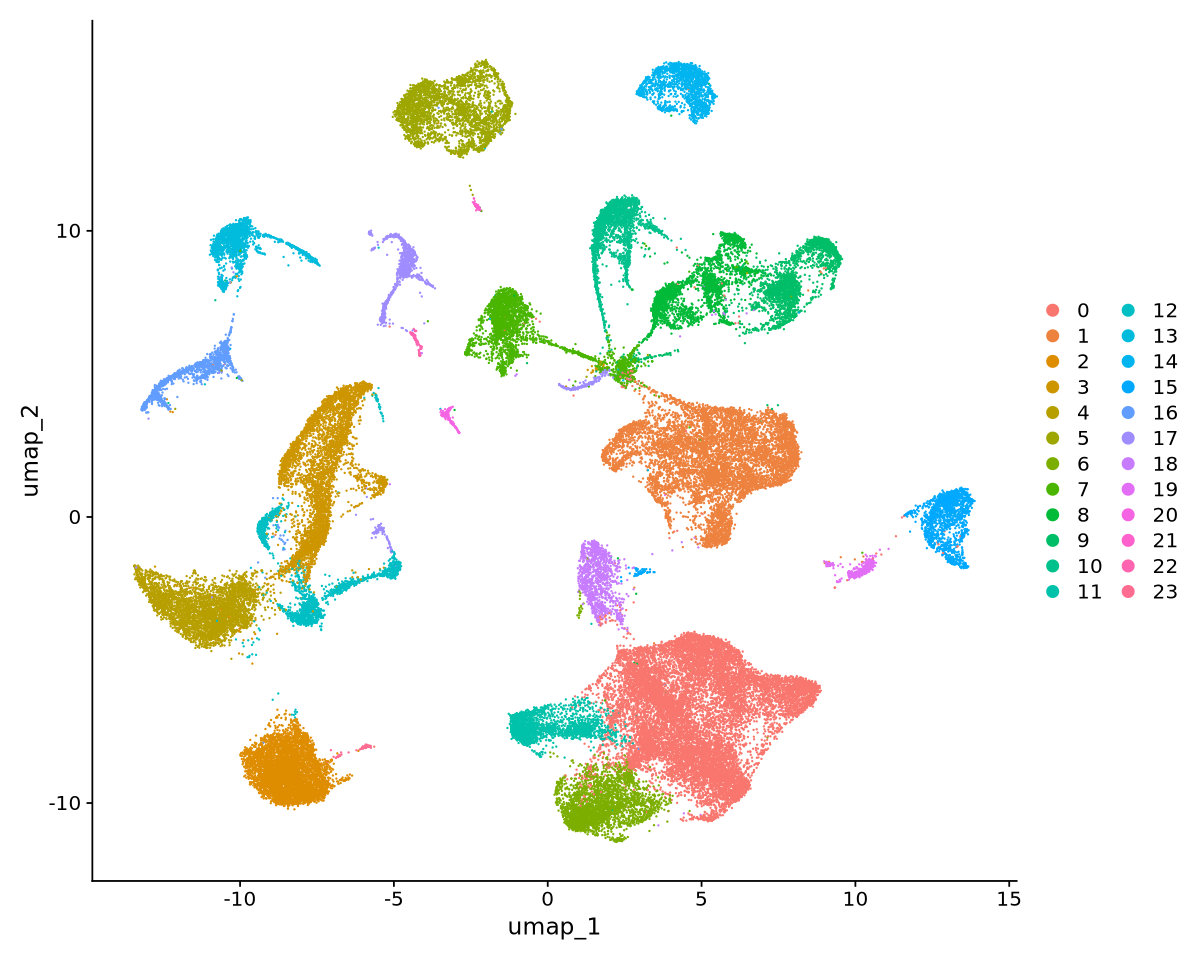

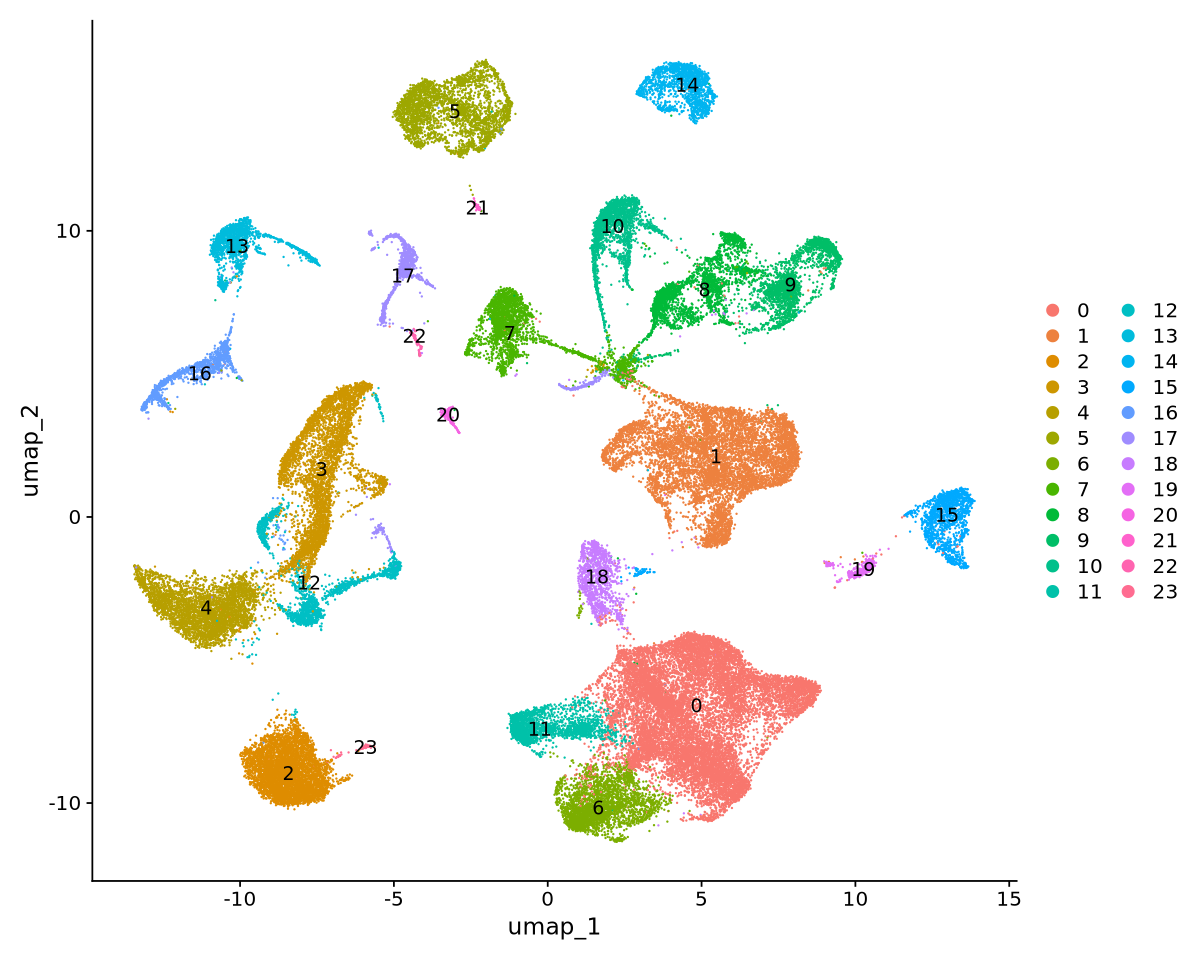

In [19]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(OC, reduction = "umap")
DimPlot(OC, reduction = "umap", label=TRUE)

In [20]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(OC, file = "/scratch/user/s4436039/scdata/GSE184880/GSE184880.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

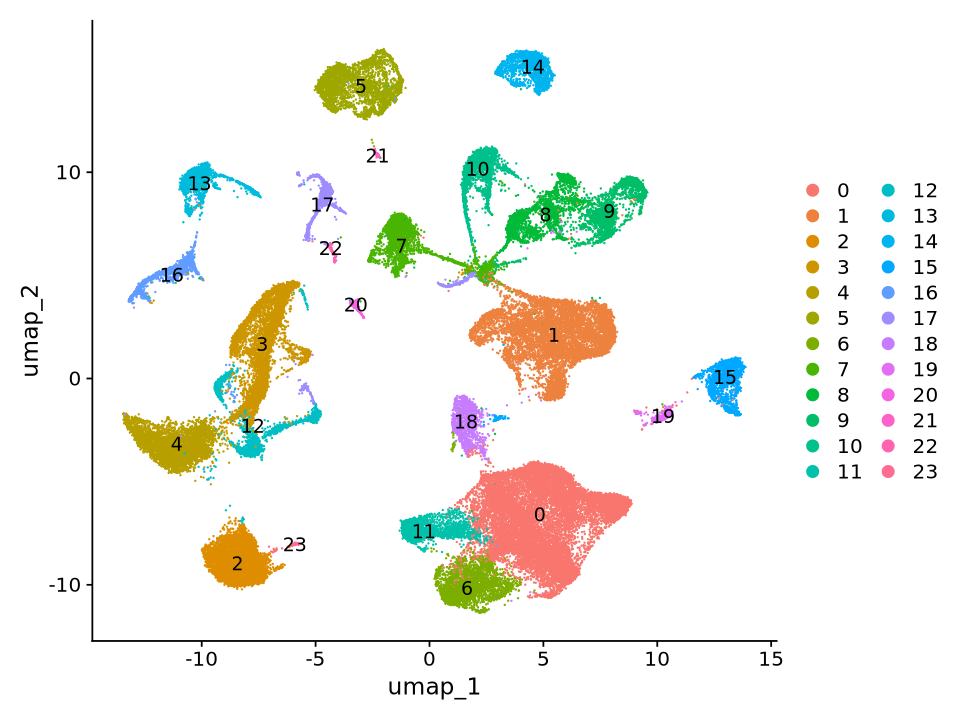

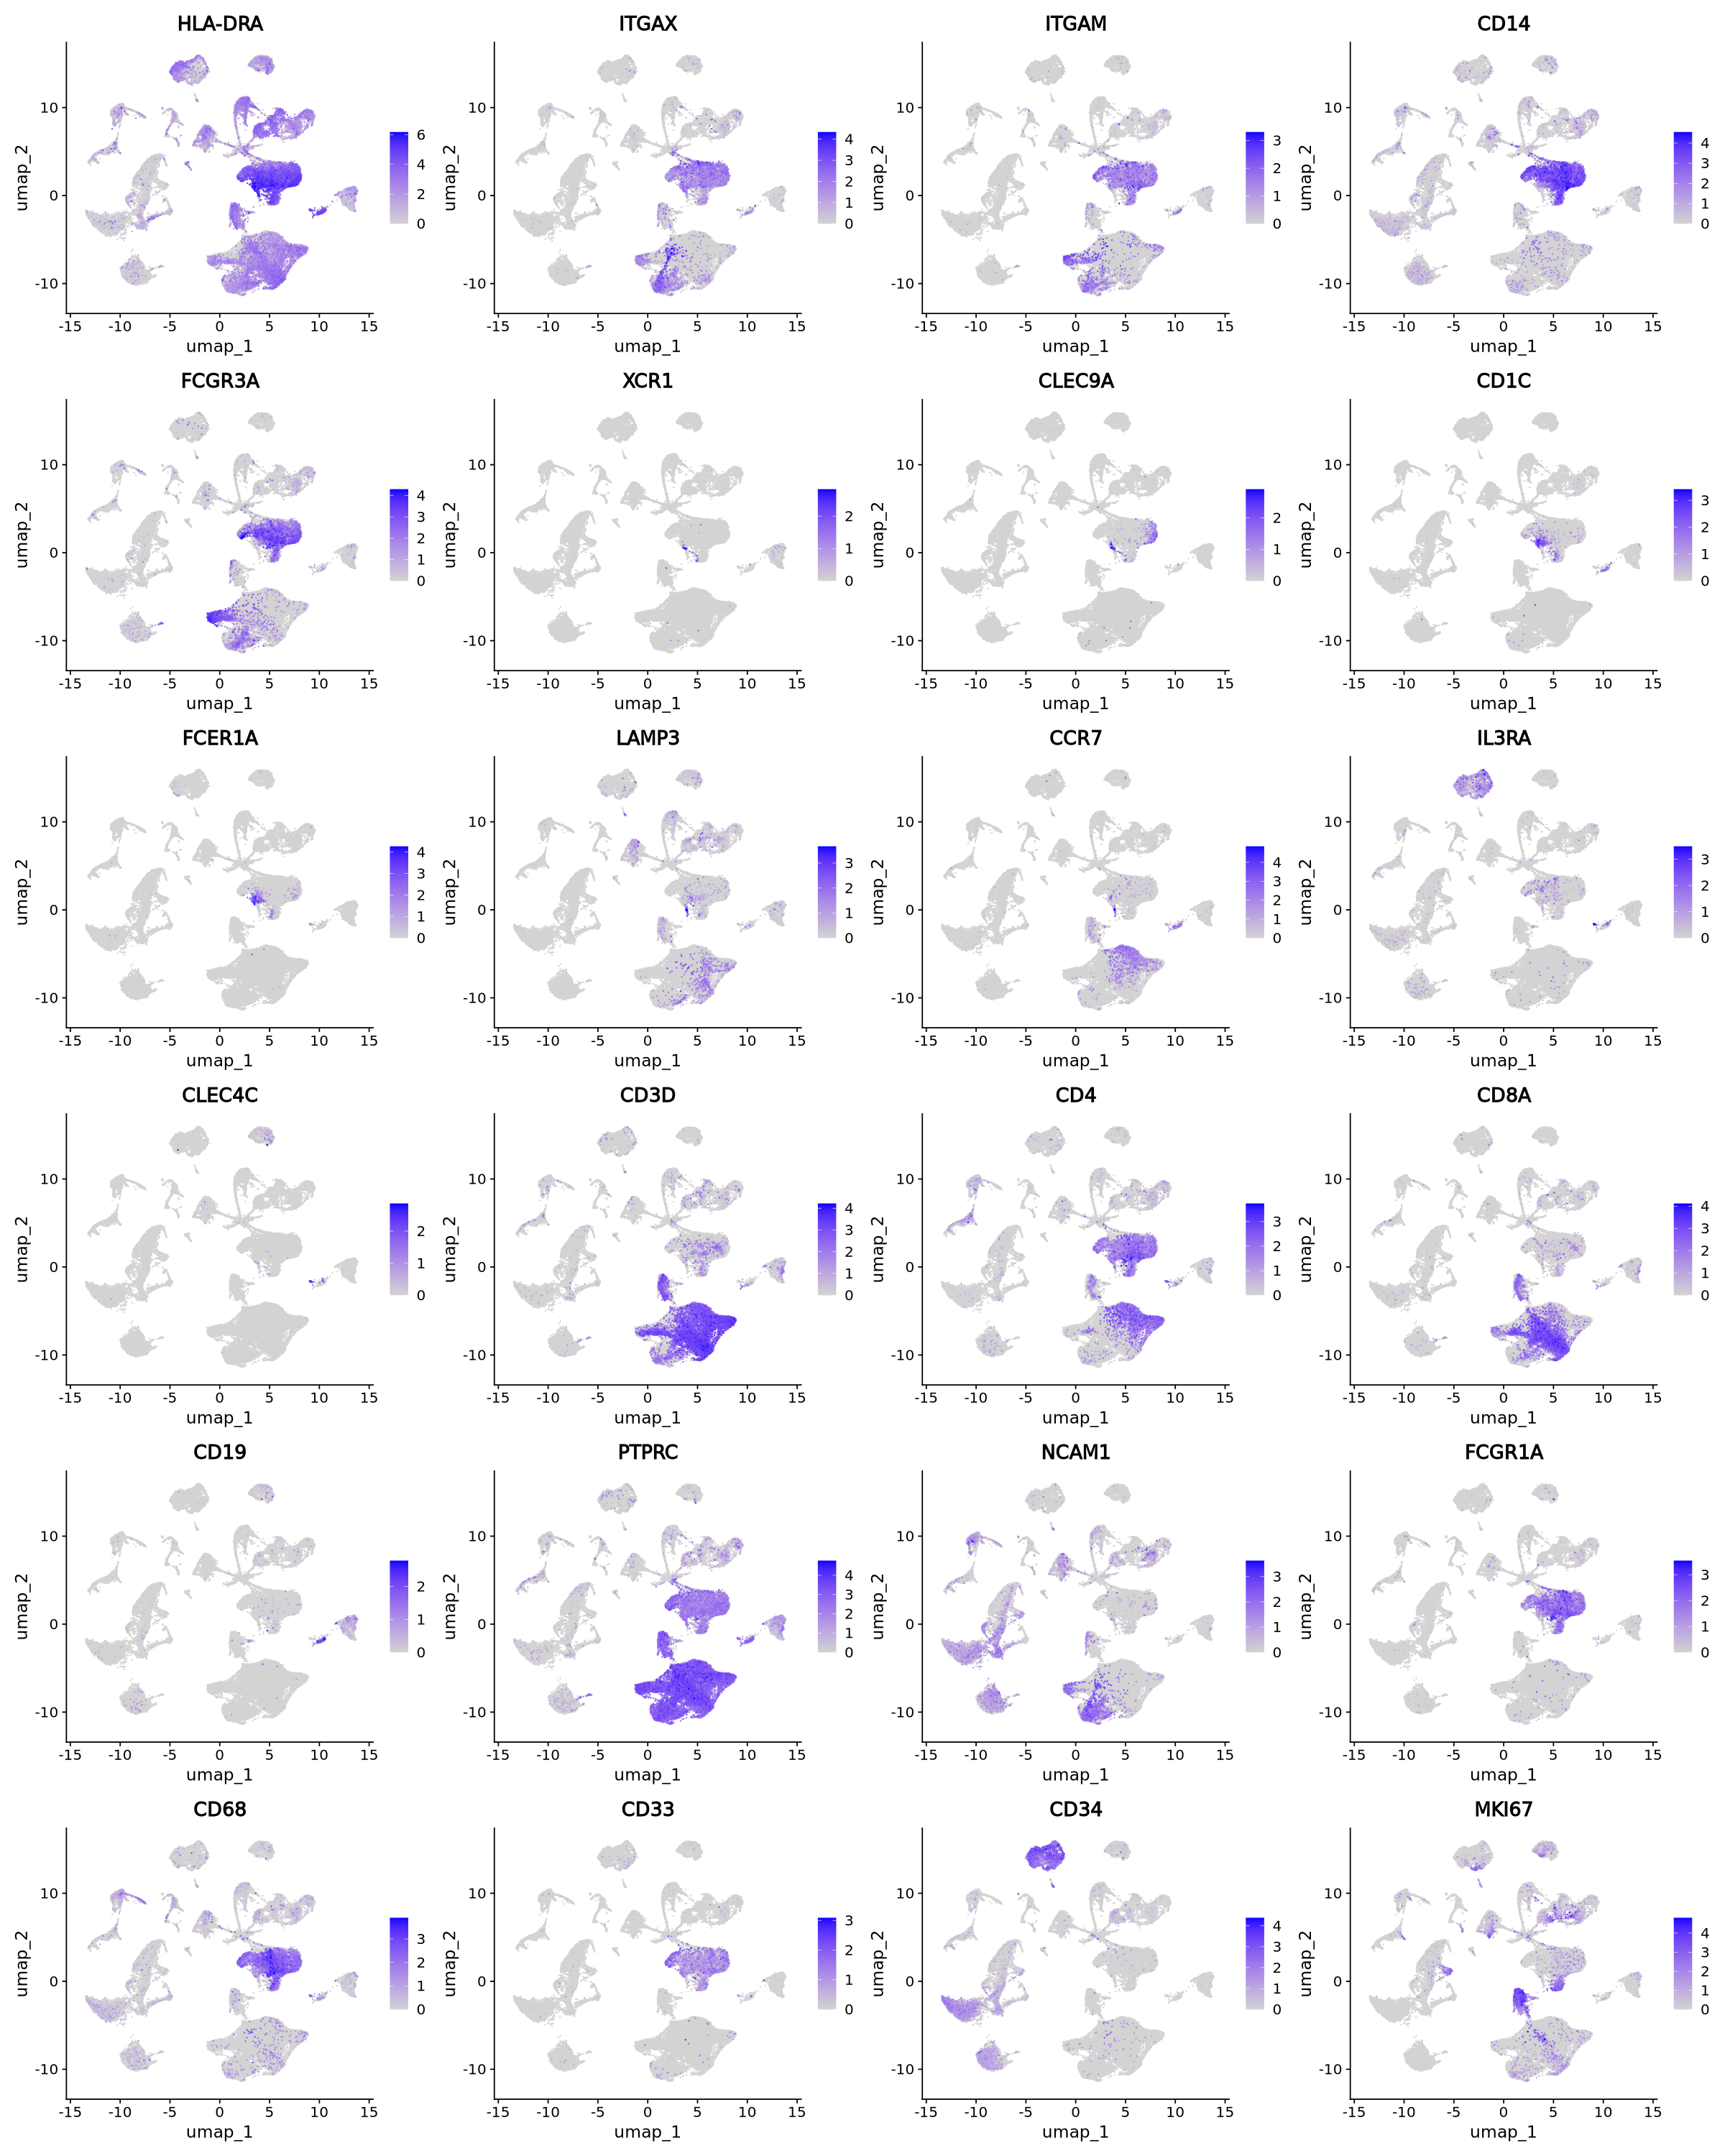

In [27]:
#Same genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(OC, reduction = "umap", label=TRUE)

options(repr.plot.height=25, repr.plot.width=20)
FeaturePlot(OC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"), order = TRUE)

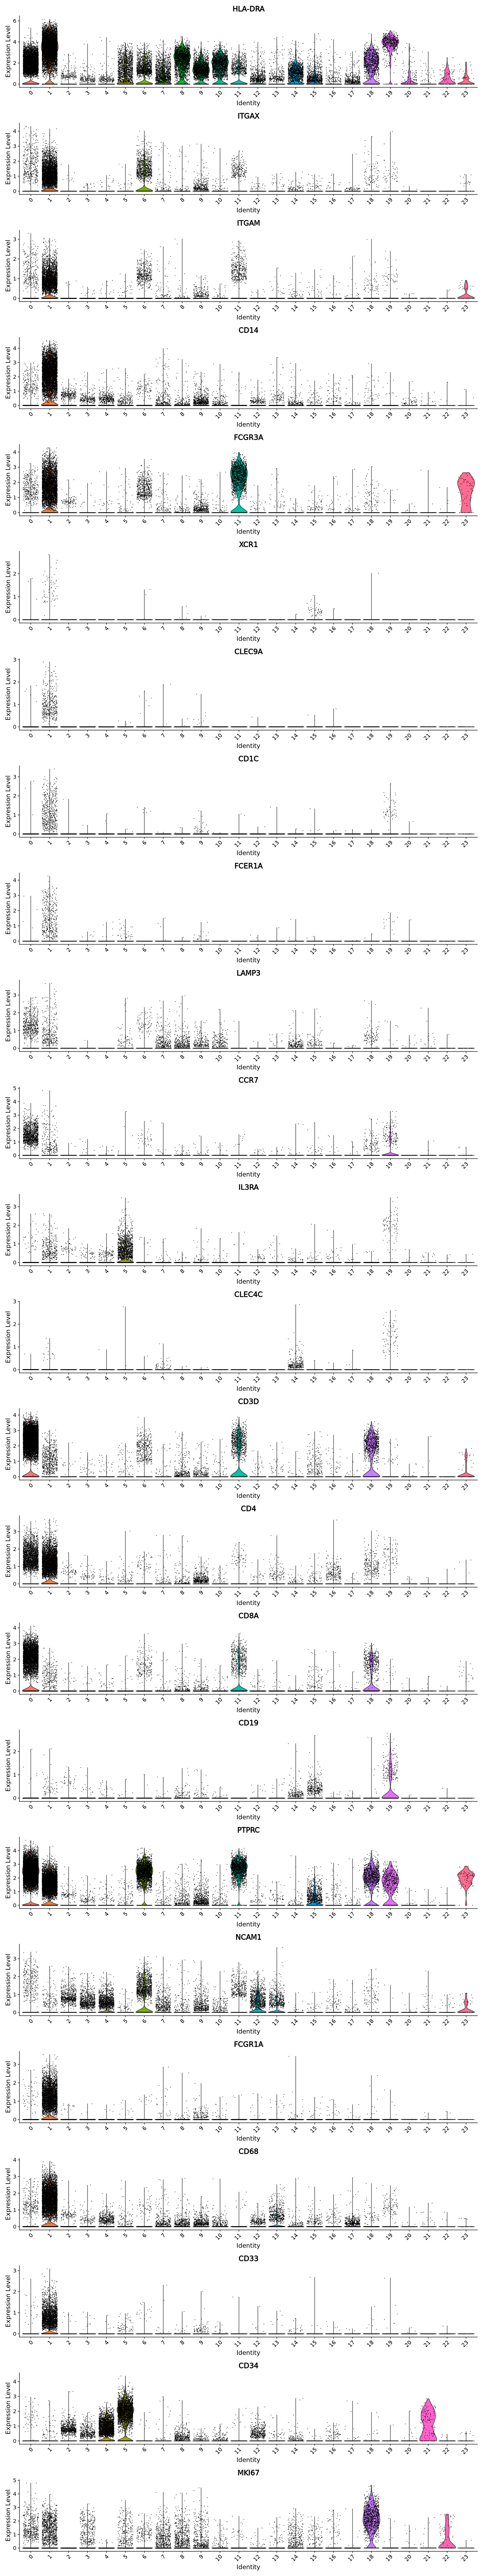

In [29]:
#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(OC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"), ncol=1)

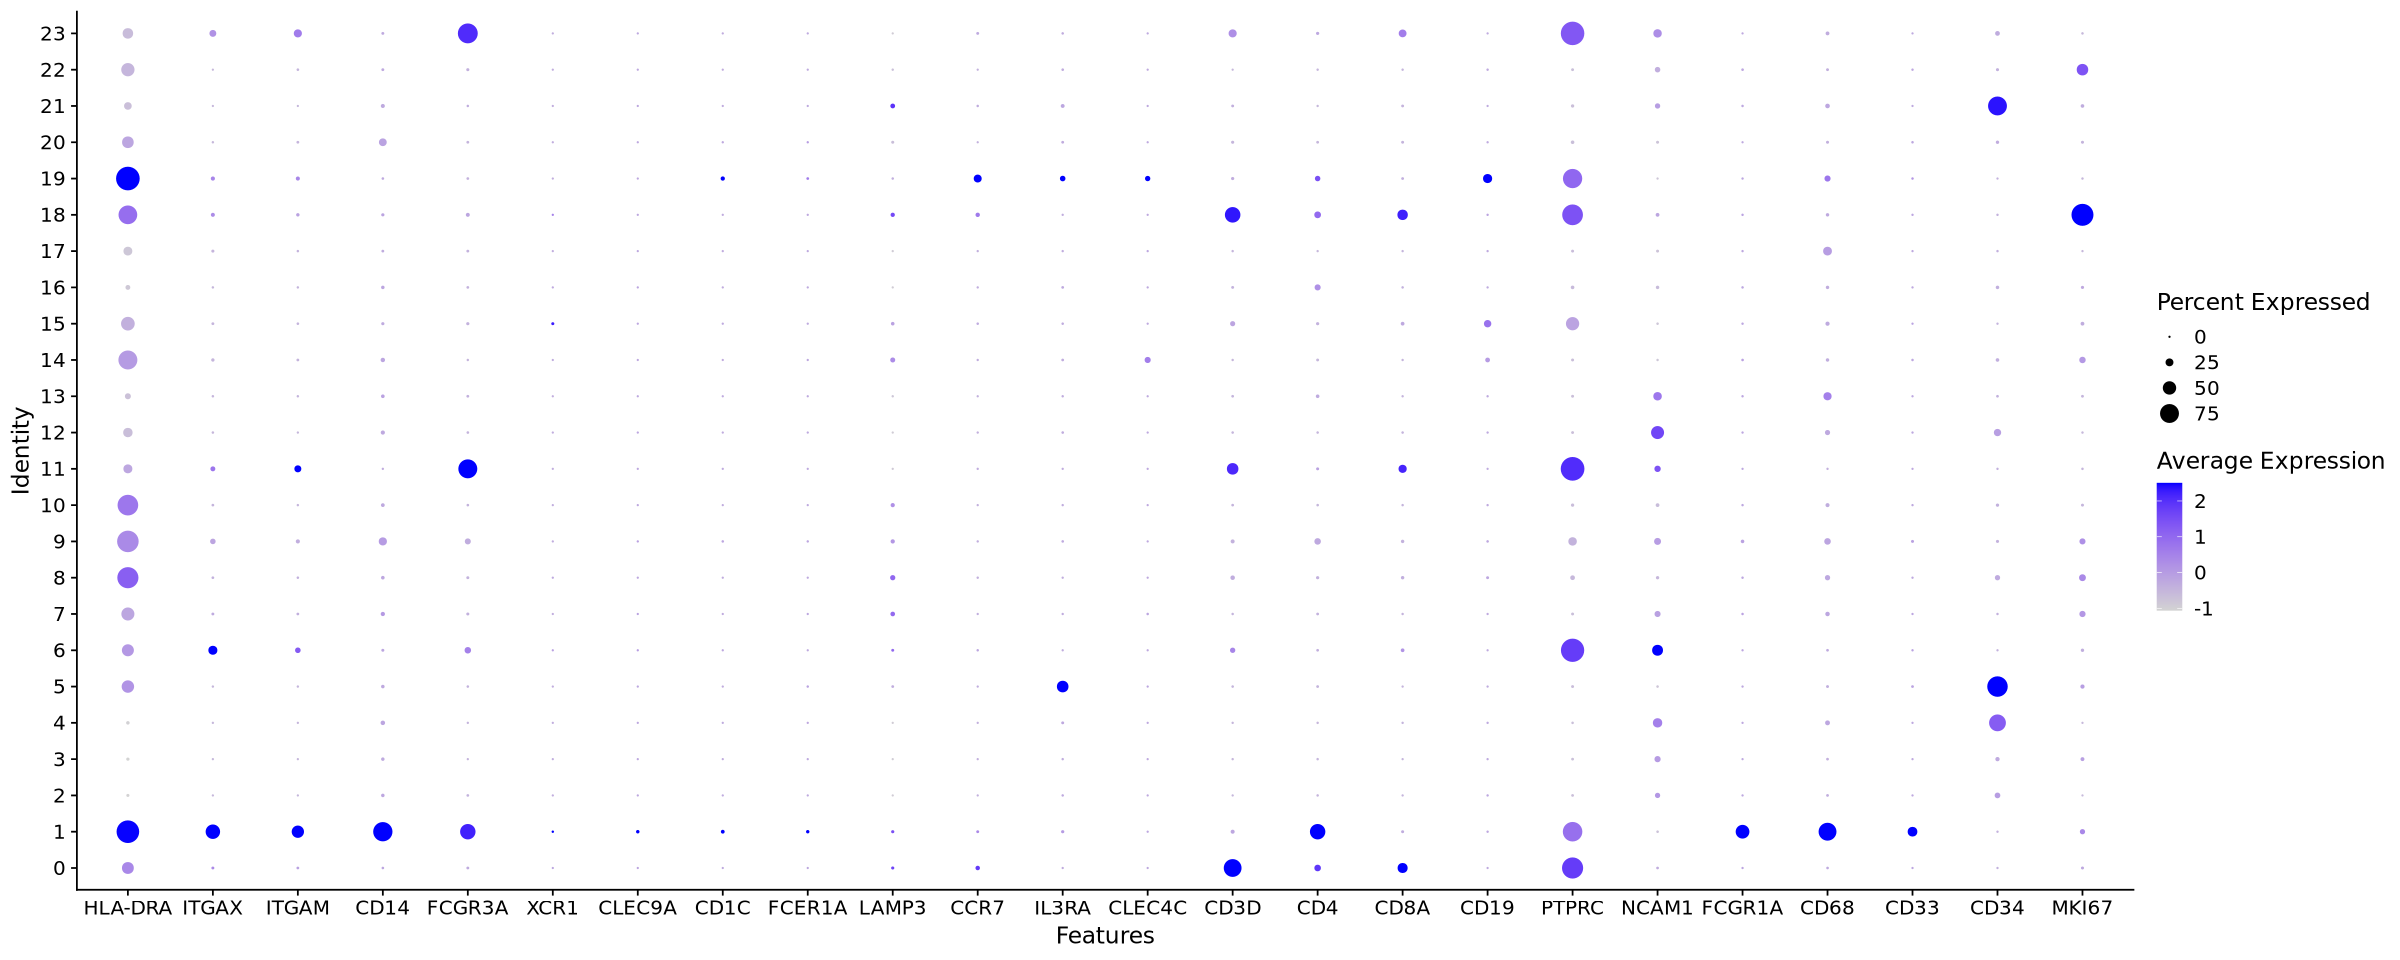

In [31]:
#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(OC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"))

#### From above it looks like cluster 1 is the myeloid cells, now subsetting out cluster 1

In [32]:
head(OC@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE184880_Cancer1_AAACCCAAGTATAGGT-1 GSE184880   4528      1744        
GSE184880_Cancer1_AAACCCACAAGGTACG-1 GSE184880  61565      6280        
GSE184880_Cancer1_AAACCCACACCATAAC-1 GSE184880  31254      6009        
GSE184880_Cancer1_AAACCCACAGCTGCCA-1 GSE184880   9374      2655        
GSE184880_Cancer1_AAACCCACATAACAGA-1 GSE184880   4304      1728        
GSE184880_Cancer1_AAACCCACATGACGGA-1 GSE184880   2659      1246        
                                     sample_type cancer_type patient_id
GSE184880_Cancer1_AAACCCAAGTATAGGT-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACAAGGTACG-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACACCATAAC-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACAGCTGCCA-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACATAACAGA-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACATGACGGA-1 tumour      HGSOC       Cancer1   
                                     sample_id               percent.mt
GSE184880_Cancer1_AAACCCAAGTATAGGT-1 GSE184880_HGSOC_Cancer1  5.477032 
GSE184880_Cancer1_AAACCCACAAGGTACG-1 GSE184880_HGSOC_Cancer1 38.377325 
GSE184880_Cancer1_AAACCCACACCATAAC-1 GSE184880_HGSOC_Cancer1 12.798362 
GSE184880_Cancer1_AAACCCACAGCTGCCA-1 GSE184880_HGSOC_Cancer1 15.980371 
GSE184880_Cancer1_AAACCCACATAACAGA-1 GSE184880_HGSOC_Cancer1  9.223978 
GSE184880_Cancer1_AAACCCACATGACGGA-1 GSE184880_HGSOC_Cancer1  8.837909 
                                     RNA_snn_res.0.2 seurat_clusters
GSE184880_Cancer1_AAACCCAAGTATAGGT-1 0               0              
GSE184880_Cancer1_AAACCCACAAGGTACG-1 9               9              
GSE184880_Cancer1_AAACCCACACCATAAC-1 9               9              
GSE184880_Cancer1_AAACCCACAGCTGCCA-1 1               1              
GSE184880_Cancer1_AAACCCACATAACAGA-1 6               6              
GSE184880_Cancer1_AAACCCACATGACGGA-1 1               1

In [33]:
myeloid_OC <- subset(OC, subset = RNA_snn_res.0.2 %in% c("1"))

In [34]:
myeloid_OC

An object of class Seurat 
27984 features across 7799 samples within 1 assay 
Active assay: RNA (27984 features, 2000 variable features)
 25 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, data.9, data.10, data.11, data.12, scale.data
 2 dimensional reductions calculated: pca, umap

In [35]:
saveRDS(myeloid_OC, "/scratch/user/s4436039/scdata/GSE184880/GSE184880_myeloid.RDS")

#### Following the above then need to move entire GSE184880 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE184880/ /QRISdata/Q5935/nikita/scdata/GSE184880
```